In [ ]:
import xcc
import os
# refresh_token = os.environ.get("XANADU_CLOUD_REFRESH_TOKEN")
# if refresh_token is not None:
#     settings = xcc.Settings(REFRESH_TOKEN=refresh_token)
#     settings.save()
# else:
#     raise EnvironmentError("XANADU_CLOUD_REFRESH_TOKEN environment variable not set")


connection = xcc.Connection.load()
assert connection.ping().ok

import xcc.commands
xcc.commands.ping()

# print("XANADU_CLOUD_REFRESH_TOKEN:", os.environ.get("XANADU_CLOUD_REFRESH_TOKEN"))

'Successfully connected to the Xanadu Cloud.'

# Reading .h5 data files

In [16]:
import h5py,sys,os
import numpy as np
# Function to print the keys of an HDF5 file

if __name__ == "__main__":
	filepath="/rds/general/user/lr1424/home/1P1Qm_SF/flat_test/TTBar+ZJets_flat.h5"
	f= h5py.File(filepath,'r')
	print(f.keys())


	# Print unique entries for all non-data keys
	non_data_keys = [
		'jetConstituentNames', 'jetConstituentsExtraNames',
		'jetFeatureNames', 
		'subjet_feature_names', 'subjet_labels', 'truth_labels'
	]

	for key in non_data_keys:
		data = f[key][:]
		unique_entries = set(data.flat) if hasattr(data, 'flat') else set(data)
		print(f"Unique entries in '{key}':", unique_entries)
  
# Get the shape of 'jetConstituentsList' dataset
if 'jetConstituentsList' in f:
	shape = f['jetConstituentsList'].shape
	print(f"Shape of 'jetConstituentsList': {shape}")
else:
	print("'jetConstituentsList' not found in file.")
 
shape1 = f['jetConstituentNames'].shape
print(f"Shape of 'jetConstituentNames': {shape1}")
print([x for x in f['jetConstituentNames']])

shape2 = f['truth_labels'].shape
print(f"Shape of 'truth_labels': {shape2}")
print([x for x in f['truth_labels']][:10])  # Print first 10 truth labels
# Print the first x jets and first 5 particles per jet with their pT, eta, phi
x = 1
jets = f['jetConstituentsList'][:x, :5, :3]  # shape: (x, 5, 3)
for jet_idx, jet in enumerate(jets):
	print(f"Jet {jet_idx}:")
	for part_idx, (eta, phi, pt) in enumerate(jet):
		eta_deg = np.degrees(eta)
		phi_deg = np.degrees(phi)
		print(f"  Particle {part_idx}: eta={eta_deg:.3f}°, phi={phi_deg:.3f}°, pT={pt:.3f}")
	print()
 
# Find max and min pt, eta, and phi from the whole file
jet_constituents = f['jetConstituentsList'][:]  # shape: (N_jets, N_particles, 3)
eta_all = jet_constituents[..., 0]
phi_all = jet_constituents[..., 1]
pt_all = jet_constituents[..., 2]

print(f"pt: min={pt_all.min():.3f}, max={pt_all.max():.3f}")
print(f"eta: min={eta_all.min():.3f}, max={eta_all.max():.3f}")
print(f"phi: min={phi_all.min():.3f}, max={phi_all.max():.3f}")

# Find percent of Top vs QCD jets in the first 1000 jets for each dataset
train_filepath="/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
test_filepath="/rds/general/user/lr1424/home/1P1Qm_SF/flat_test/TTBar+ZJets_flat.h5"
val_filepath="/rds/general/user/lr1424/home/1P1Qm_SF/flat_val/TTBar+ZJets_flat.h5"

train = h5py.File(train_filepath, 'r')
test = h5py.File(test_filepath, 'r')
val = h5py.File(val_filepath, 'r')

print(len([truth_label for truth_label in train['truth_labels'][:100] if truth_label == 1])/100, "Top jets in first 100 train jets")
print(len([truth_label for truth_label in test['truth_labels'][:100] if truth_label == 1])/100, "Top jets in first 100 test jets")
print(len([truth_label for truth_label in val['truth_labels'][:100] if truth_label == 1])/100, "Top jets in first 100 val jets")

<KeysViewHDF5 ['PFCand_subjet_idx', 'jetConstituentNames', 'jetConstituentsExtra', 'jetConstituentsExtraNames', 'jetConstituentsList', 'jetFeatureNames', 'jetFeatures', 'num_PFCands_subleading_jet', 'subjet_feature_names', 'subjet_features', 'subjet_labels', 'truth_labels']>
Unique entries in 'jetConstituentNames': {b'phi', b'eta', b'pt'}
Unique entries in 'jetConstituentsExtraNames': {b'part_dzerr', b'part_charge', b'part_dzval', b'part_isElectron', b'part_d0err', b'part_isPhoton', b'part_isChargedHadron', b'part_isNeutralHadron', b'part_isMuon', b'part_d0val'}
Unique entries in 'jetFeatureNames': {b'jet_nparticles', b'jet_phi', b'jet_energy', b'jet_sdmass', b'jet_tau4', b'jet_pt', b'jet_tau1', b'jet_tau2', b'jet_tau3', b'jet_eta'}
Unique entries in 'subjet_feature_names': {b'sj2Eta', b'sj1E', b'sj2Phi', b'sj1Pt', b'sj2E', b'sj1Phi', b'sj1Eta', b'sj2Pt'}
Unique entries in 'subjet_labels': {0.0, 1.0, -1.0}
Unique entries in 'truth_labels': {0.0, 1.0}
Shape of 'jetConstituentsList': (20

# Dim vs Wire Trash Mode Heatmaps

[summary] dim=4: 20/20 runs
[summary] dim=5: 14/14 runs


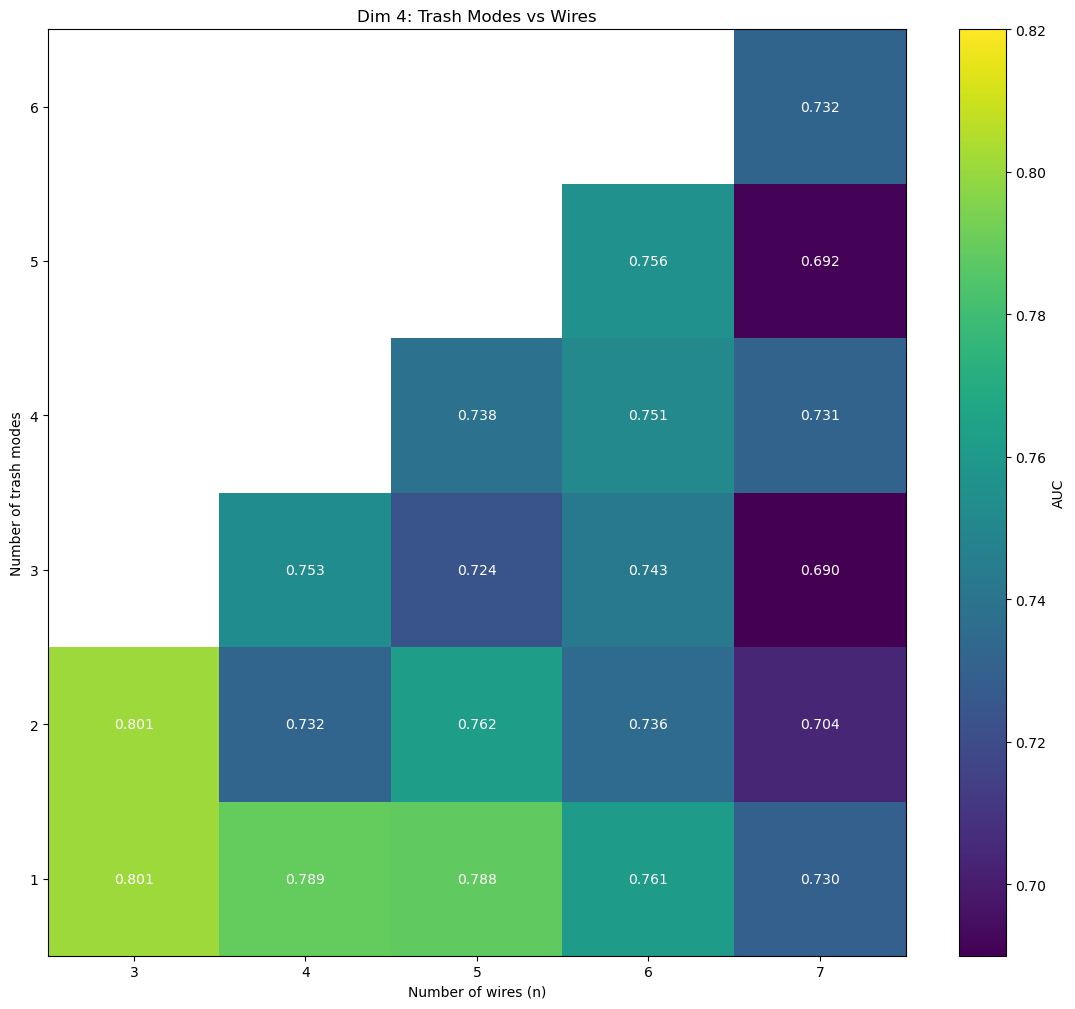

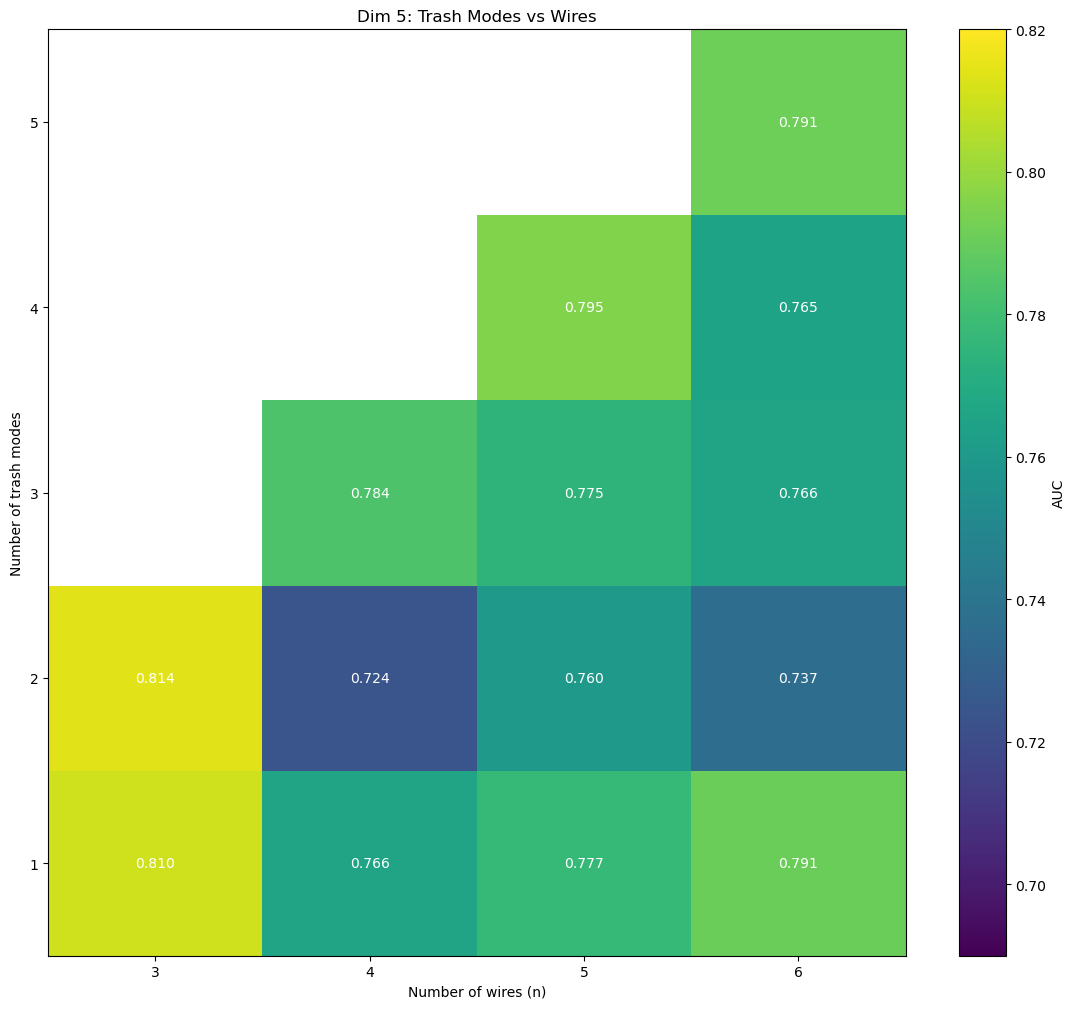

In [1]:
from sf_refactor.analysis_trash_sweep import collect_trash_sweep_matrix, plot_trash_sweep_heatmap
LOG_DIR = "/rds/general/user/lr1424/home/1P1Qm_SF/sf_refactor/sf_auto_logs/trash_sweep"
DIM = [4,5]  # change to 5 for the other sweep set

for dim in DIM:
    # Build the AUC matrix for the chosen dim (prints a summary by default if job files exist)
    df = collect_trash_sweep_matrix(dim=dim, log_dir=LOG_DIR, debug=False)

    # Plot heatmap
    fig, ax = plot_trash_sweep_heatmap(df, title=f'Dim {dim}: Trash Modes vs Wires', clim = (0.69, 0.82))
    fig.show()

### Same but with maximally entangled beamsplitter circuit

[summary] dim=4: 20/20 runs
[summary] dim=5: 14/14 runs


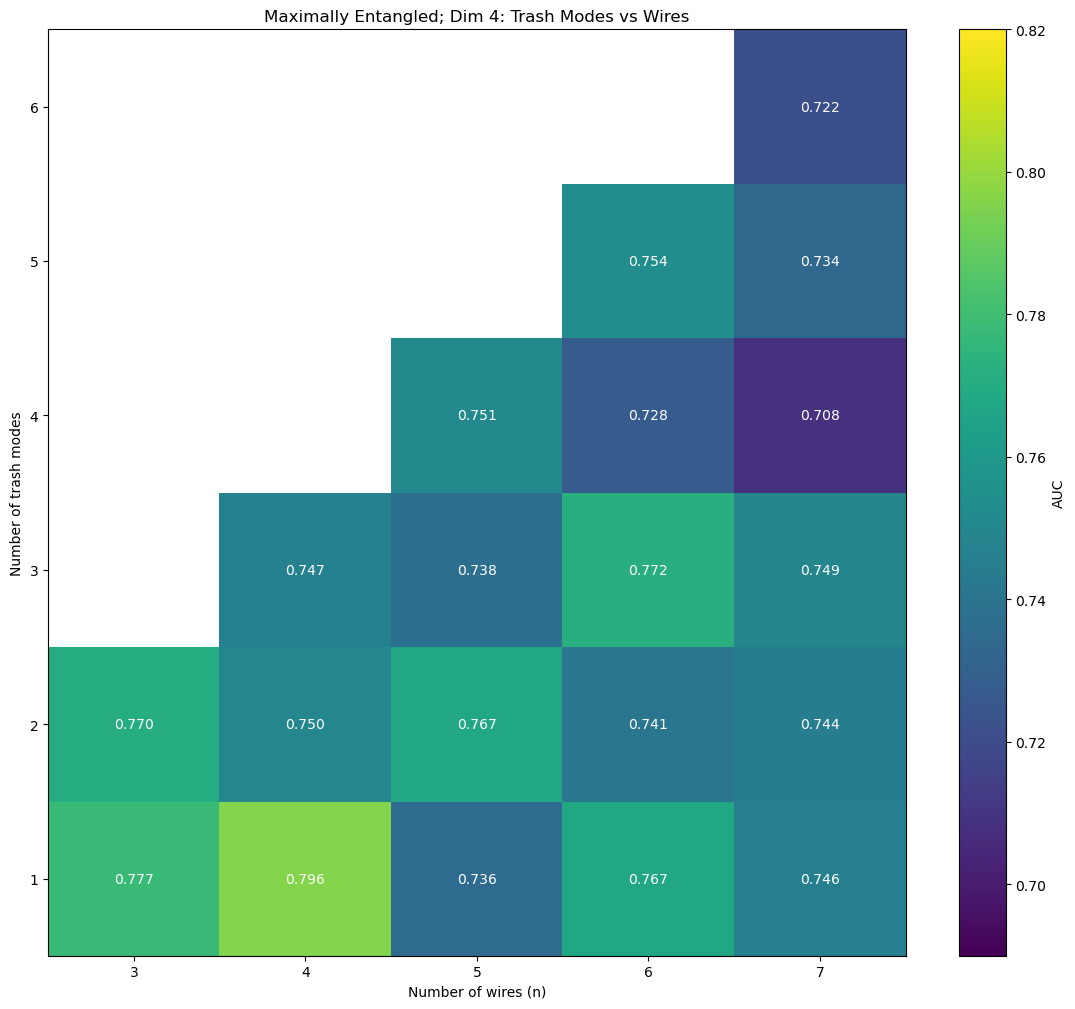

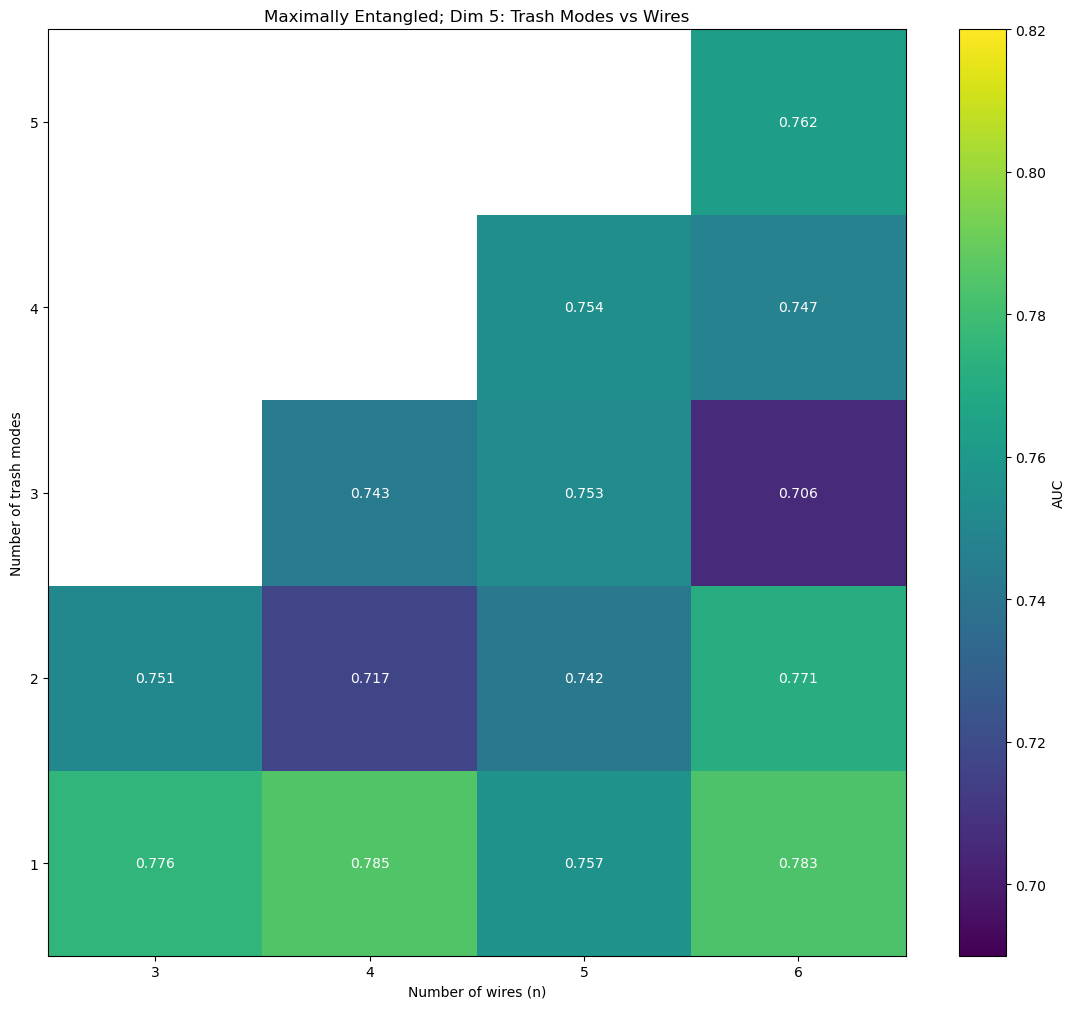

In [2]:
from sf_refactor.analysis_trash_sweep import collect_trash_sweep_matrix, plot_trash_sweep_heatmap
LOG_DIR = "/rds/general/user/lr1424/home/1P1Qm_SF/sf_refactor/sf_auto_logs/trash_sweep_entangled"
DIM = [4,5]  # change to 5 for the other sweep set

for dim in DIM:
    # Build the AUC matrix for the chosen dim (prints a summary by default if job files exist)
    df = collect_trash_sweep_matrix(dim=dim, log_dir=LOG_DIR, debug=False)

    # Plot heatmap
    fig, ax = plot_trash_sweep_heatmap(df, title=f'Maximally Entangled; Dim {dim}: Trash Modes vs Wires', clim = (0.69, 0.82))
    fig.show()

# Circuit Diagram

### Requires `quantum-photonic` env

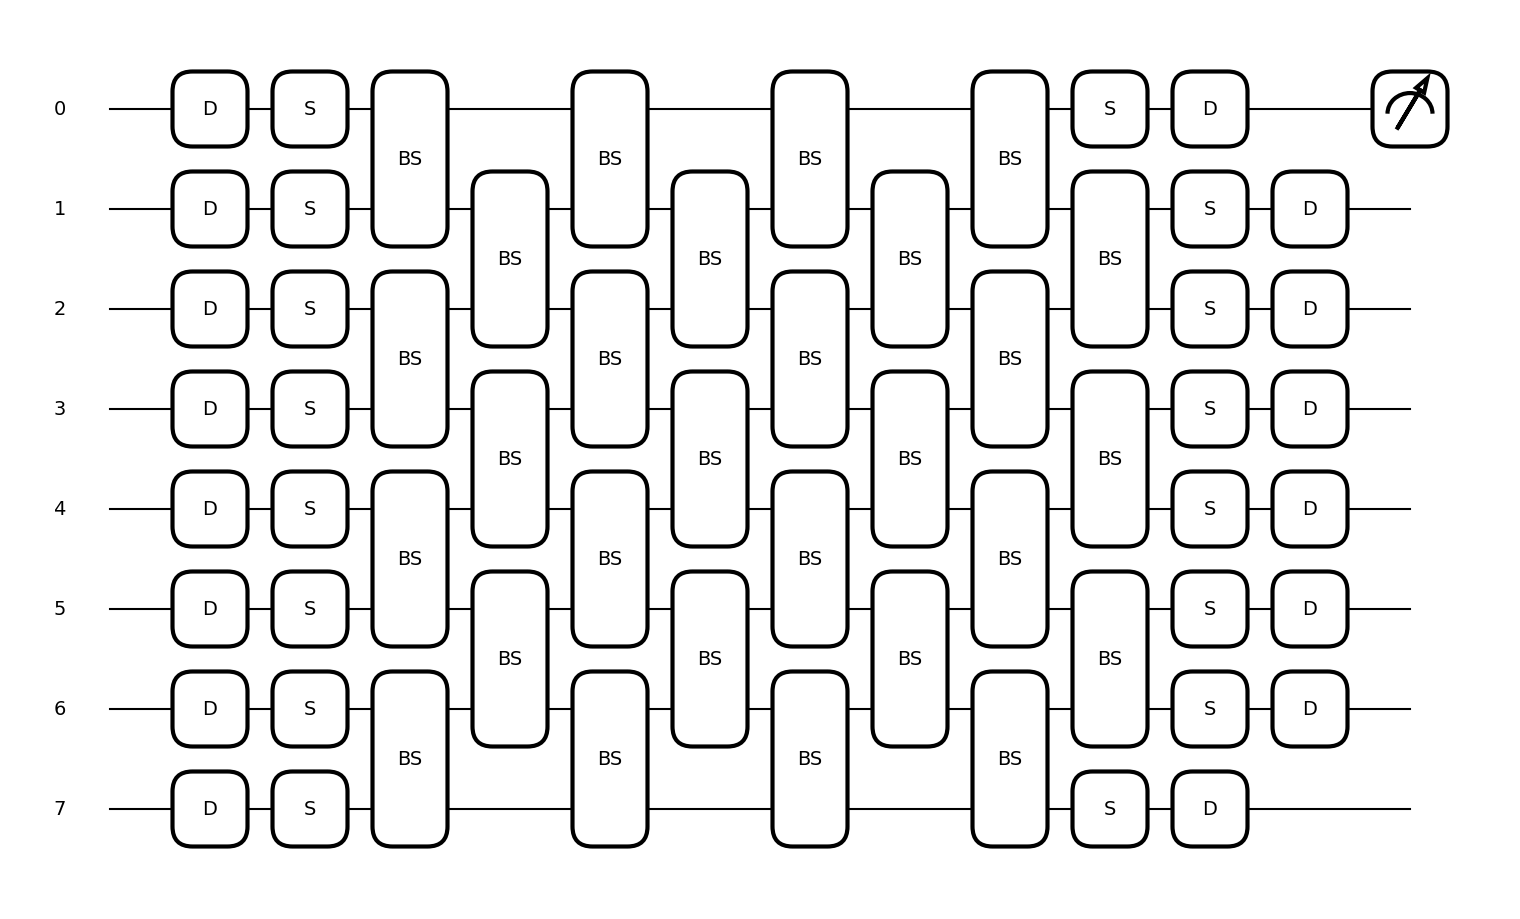

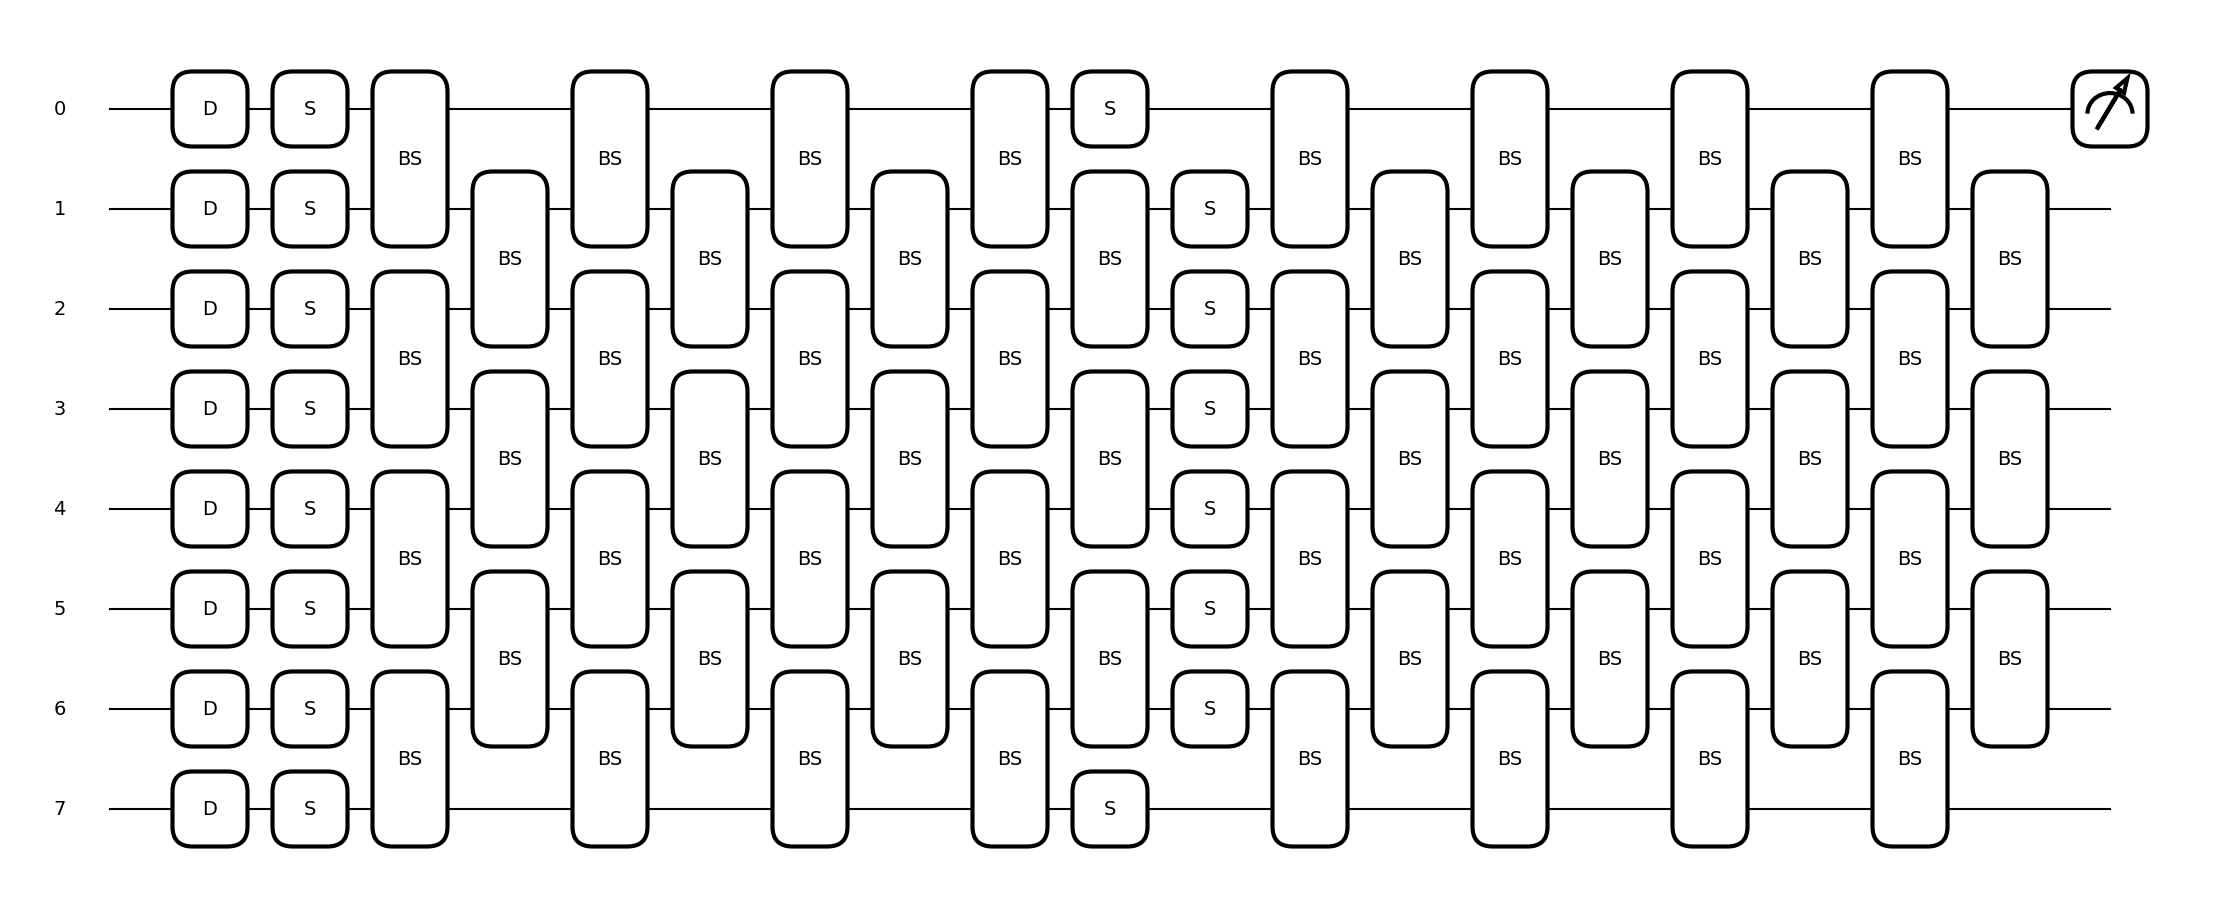

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml

# ---------- knobs ----------
NUM_MODES = 8                # = wires
DEPTH = NUM_MODES            # same as your code
auto_wires = list(range(NUM_MODES))
# ---------------------------

# dummy "weights"/inputs (non-zero so gates render)
rng = np.random.default_rng(7)
eta  = rng.uniform(0.1, 0.5, size=NUM_MODES)          # plays role of your eta
pt   = rng.uniform(0.1, 0.5, size=NUM_MODES)          # pt
phi  = rng.uniform(0.1, 0.5, size=NUM_MODES)          # phi

s_scale = 0.7
squeeze_mag   = rng.uniform(0.05, 0.4, size=NUM_MODES)
squeeze_phase = rng.uniform(0.0,  2*np.pi, size=NUM_MODES)
disp_mag      = rng.uniform(0.05, 0.4, size=NUM_MODES)
disp_phase    = rng.uniform(0.0,  2*np.pi, size=NUM_MODES)

# SF backend (Gaussian is perfect since we only use Gaussian ops)
dev = qml.device("strawberryfields.gaussian", wires=NUM_MODES, cutoff_dim=None)

@qml.qnode(dev)
def CV_circuit_two_interfs(_weights=None, _inputs=None):
    # ----- data-encoding layer -----
    scale = 10.0 / (1.0 + np.exp(-s_scale)) + 0.01
    for w in auto_wires:
        qml.Displacement(scale * pt[w], eta[w], wires=w)
        qml.Squeezing(eta[w], pt[w] * phi[w] / 2.0, wires=w)

    # ----- first interferometer (fixed 50:50 BS mesh) -----
    for layer in range(DEPTH):
        start = 0 if (layer % 2 == 0) else 1
        for i in range(start, NUM_MODES - 1, 2):
            qml.Beamsplitter(np.pi / 4.0, np.pi / 2.0, wires=[i, i + 1])

    # ----- single Sgate layer -----
    for w in auto_wires:
        qml.Squeezing(squeeze_mag[w], squeeze_phase[w], wires=w)

    # ----- second interferometer (same mesh) -----
    for layer in range(DEPTH):
        start = 0 if (layer % 2 == 0) else 1
        for i in range(start, NUM_MODES - 1, 2):
            qml.Beamsplitter(np.pi / 4.0, np.pi / 2.0, wires=[i, i + 1])

    return qml.expval(qml.X(0))

@qml.qnode(dev)
def CV_circuit(_weights=None, _inputs=None):
    # ----- data-encoding layer -----
    scale = 10.0 / (1.0 + np.exp(-s_scale)) + 0.01
    for w in auto_wires:
        # Dgate(scale * pt[w], eta[w])
        qml.Displacement(scale * pt[w], eta[w], wires=w)
        # Sgate(eta[w], pt[w] * phi[w] / 2)
        qml.Squeezing(eta[w], pt[w] * phi[w] / 2.0, wires=w)

    # ----- alternating mesh of fixed 50:50 BS -----
    for layer in range(DEPTH):
        start = 0 if (layer % 2 == 0) else 1
        for i in range(start, NUM_MODES - 1, 2):
            # BSgate(pi/4, pi/2)
            qml.Beamsplitter(np.pi / 4.0, np.pi / 2.0, wires=[i, i + 1])

    # ----- final per-mode trainables -----
    for w in auto_wires:
        # Sgate(squeeze_mag[w], squeeze_phase[w])
        qml.Squeezing(squeeze_mag[w], squeeze_phase[w], wires=w)
        # Dgate(disp_mag[w], disp_phase[w])
        qml.Displacement(disp_mag[w], disp_phase[w], wires=w)

    # Any CV observable is fine; we just need something to return.
    return qml.expval(qml.X(0))


# Draw it
fig, ax = qml.draw_mpl(CV_circuit)()
plt.show()

# Draw it
fig, ax = qml.draw_mpl(CV_circuit_two_interfs)()
plt.show()


# Observing Loss (Old)

In [1]:
import glob
import re

log_files = glob.glob("/home/hep/lr1424/1P1Qm_fork/output_logs/*.log")
pattern = re.compile(r"Epoch\s+(\d+)/(\d+)\s+-\s+Training Loss:\s+([\d.]+)\s+-\s+Validation Loss:\s+([\d.]+)")

for log_file in log_files:
    print(f"Processing {log_file}")
    with open(log_file, "r") as f:
        for line in f:
            match = pattern.search(line)
            if match:
                epoch, total_epochs, train_loss, val_loss = match.groups()
                print(f"\t Epoch {epoch}/{total_epochs} - Training Loss: {train_loss} - Validation Loss: {val_loss}")
    print()

Processing /home/hep/lr1424/1P1Qm_fork/output_logs/2000_jets.log
	 Epoch 1/10 - Training Loss: 0.6948 - Validation Loss: 0.6930
	 Epoch 2/10 - Training Loss: 0.6948 - Validation Loss: 0.6930

Processing /home/hep/lr1424/1P1Qm_fork/output_logs/100_jets_MSE.log
	 Epoch 1/10 - Training Loss: 0.2514 - Validation Loss: 0.2501
	 Epoch 2/10 - Training Loss: 0.2513 - Validation Loss: 0.2506
	 Epoch 3/10 - Training Loss: 0.2513 - Validation Loss: 0.2509
	 Epoch 4/10 - Training Loss: 0.2513 - Validation Loss: 0.2511
	 Epoch 5/10 - Training Loss: 0.2513 - Validation Loss: 0.2512
	 Epoch 6/10 - Training Loss: 0.2513 - Validation Loss: 0.2512
	 Epoch 7/10 - Training Loss: 0.2513 - Validation Loss: 0.2513
	 Epoch 8/10 - Training Loss: 0.2513 - Validation Loss: 0.2513
	 Epoch 9/10 - Training Loss: 0.2513 - Validation Loss: 0.2513
	 Epoch 10/10 - Training Loss: 0.2513 - Validation Loss: 0.2513

Processing /home/hep/lr1424/1P1Qm_fork/output_logs/100_jets_BCE.log
	 Epoch 1/10 - Training Loss: 0.6959 - V

# Process log (AUC and loss plot)

Epoch 1/20 - Training Loss: 0.6666 - Validation Loss: 0.6530 - Validation AUC: 0.7387
Epoch 2/20 - Training Loss: 0.6418 - Validation Loss: 0.6349 - Validation AUC: 0.7735
Epoch 3/20 - Training Loss: 0.6300 - Validation Loss: 0.6279 - Validation AUC: 0.7838
Epoch 4/20 - Training Loss: 0.6269 - Validation Loss: 0.6265 - Validation AUC: 0.7944
Epoch 5/20 - Training Loss: 0.6258 - Validation Loss: 0.6261 - Validation AUC: 0.7960
Epoch 6/20 - Training Loss: 0.6250 - Validation Loss: 0.6266 - Validation AUC: 0.8050
Epoch 7/20 - Training Loss: 0.6256 - Validation Loss: 0.6275 - Validation AUC: 0.7913
Epoch 8/20 - Training Loss: 0.6241 - Validation Loss: 0.6269 - Validation AUC: 0.8092
Epoch 9/20 - Training Loss: 0.6255 - Validation Loss: 0.6262 - Validation AUC: 0.8049
Epoch 10/20 - Training Loss: 0.6253 - Validation Loss: 0.6275 - Validation AUC: 0.7969
Epoch 11/20 - Training Loss: 0.6250 - Validation Loss: 0.6304 - Validation AUC: 0.7899
Epoch 12/20 - Training Loss: 0.6240 - Validation Los

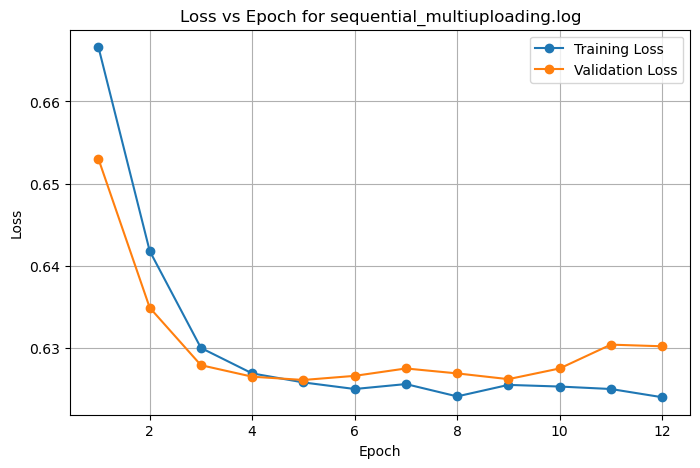

In [10]:
import os
import re
import glob
import matplotlib.pyplot as plt

log_file = r"/rds/general/user/lr1424/home/1P1Qm_SF/sf_refactor/sf_main_logs/sequential_multiuploading.log"
pattern = re.compile(
    r"Epoch\s+(\d+)/(\d+)\s+-\s+Training Loss:\s+([\d.]+)\s+-\s+Validation Loss:\s+([\d.]+)\s+-\s+Validation AUC:\s+([\d.]+)"
)
end_pattern = re.compile(r"Training completed.")

with open(log_file, "r") as f:
    lines = [line.strip() for line in f if line.strip()]  # Remove empty lines

    early_stopping_found = False
    summary_found = False

    idx = 0
    while idx < len(lines):
        line = lines[idx]

        # Match epoch info
        match = pattern.search(line)
        if match:
            epoch, total_epochs, train_loss, val_loss, val_auc = match.groups()
            print(
                f"Epoch {epoch}/{total_epochs} - Training Loss: {train_loss} - Validation Loss: {val_loss} - Validation AUC: {val_auc}"
            )

        # Early stopping
        elif line.startswith("Early stopping triggered after") and not early_stopping_found:
            print(line)
            if idx + 1 < len(lines):
                print(lines[idx + 1])
            early_stopping_found = True

        # Training completed summary
        elif end_pattern.match(line) and not summary_found:
            print(line)
            if idx + 1 < len(lines):
                print(lines[idx + 1])
            if idx + 2 < len(lines):
                print(lines[idx + 2])
            summary_found = True

        idx += 1


pattern = re.compile(
    r"Epoch\s+(\d+)/(\d+)\s+-\s+Training Loss:\s+([\d.]+)\s+-\s+Validation Loss:\s+([\d.]+)\s+-\s+Validation AUC:\s+([\d.]+)"
)

print(f"File: {log_file}")
epochs = []
train_losses = []
val_losses = []
with open(log_file, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            epoch, total_epochs, train_loss, val_loss, val_auc = match.groups()
            epochs.append(int(epoch))
            train_losses.append(float(train_loss))
            val_losses.append(float(val_loss))
if epochs:
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, marker='o', linestyle='-', label="Training Loss")
    plt.plot(epochs, val_losses, marker='o', linestyle='-', label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss vs Epoch for {os.path.basename(log_file)}")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No matching loss entries found in this file.\n")

# Test Feature Scaling

In [58]:
assumed_limits = {
    'pt':  [1e-4, 1000.0],
    'eta': [-0.8, 0.8],
    'phi': [-0.8, 0.8],
}
# Define feature limits for scaling
feature_limits = {
    'pt':  [0.0, 1.0],
    'eta': [-np.pi, np.pi],
    'phi': [-np.pi, np.pi],
}


def scale_feature(value, name):
    a_min, a_max = assumed_limits[name]
    f_min, f_max = feature_limits[name]
    return (value - a_min) / (a_max - a_min) * (f_max - f_min) + f_min

train = h5py.File(train_filepath, 'r')

jet_constituents = train['jetConstituentsList'][:]  # shape: (N_jets, N_particles, 3) where 3 is (eta, phi, pt)
# Only take the first 10 particles per jet
pt_all = jet_constituents[..., 2]  # shape: (N_jets, 100)
pt_all_reduced = jet_constituents[:, :10, 2] # shape: (N_jets, 10)
print(pt_all.shape) 
pt_scale  = scale_feature(pt_all, "pt")

# Compare scale_feature pT scaling vs. dividing by jet pT
# Unique entries in 'jetFeatureNames': [b'jet_pt', b'jet_eta', b'jet_phi', b'jet_energy', b'jet_nparticles', b'jet_sdmass', b'jet_tau1', b'jet_tau2', b'jet_tau3', b'jet_tau4']
jet_features = train['jetFeatures'] # (40000, 10)
jet_pt = jet_features[:, 0]  # shape: (40000,)
print(jet_pt.shape)

# Average jet-scaled pT - Divide the particle pT (100 values per jet) by the jet pT (one value per jet)
print(jet_pt[:, np.newaxis].shape)  # shape: (40000, 1)
pt_jet_scale = pt_all / jet_pt[:, np.newaxis]  # shape: (40000, 100)

# Average scale_feature pT
print("Avg Scale feature pT (all particles):", np.mean(pt_scale))

# Average jet-scaled pT
print("Avg Jet scaled pT (all particles):", np.mean(pt_jet_scale))

print("")
# For only the first 10 particles per jet
# Average scale_feature pT for the first 10 particles per jet
pt_scale_reduced  = scale_feature(pt_all_reduced, "pt")
print("Avg Scale feature pT (first 10 particles):", np.mean(pt_scale_reduced))

# Print the first 10 particles per jet with their scaled pT
pt_jet_scale_reduced = pt_all_reduced / jet_pt[:, np.newaxis]  # shape: (40000, 100)
print("Avg Jet scaled pT (first 10 particles):", np.mean(pt_jet_scale_reduced))

print("\nFirst 10 jets pT and the highest pT particle in each jet:")
for i in range(10):
    print(f"Jet {i}: pT = {jet_pt[i]:.2f}, highest pT particle = {pt_all_reduced[i].max():.2f}")


(40000, 100)
(40000,)
(40000, 1)
Avg Scale feature pT (all particles): 0.007425487418083464
Avg Jet scaled pT (all particles): 0.009904823525476713

Avg Scale feature pT (first 10 particles): 0.05522977750521569
Avg Jet scaled pT (first 10 particles): 0.0737490069449244

First 10 jets pT and the highest pT particle in each jet:
Jet 0: pT = 504.72, highest pT particle = 98.57
Jet 1: pT = 606.58, highest pT particle = 79.00
Jet 2: pT = 731.47, highest pT particle = 96.59
Jet 3: pT = 937.12, highest pT particle = 169.20
Jet 4: pT = 760.87, highest pT particle = 86.53
Jet 5: pT = 842.79, highest pT particle = 270.16
Jet 6: pT = 965.30, highest pT particle = 176.70
Jet 7: pT = 920.39, highest pT particle = 37.42
Jet 8: pT = 521.40, highest pT particle = 105.10
Jet 9: pT = 873.05, highest pT particle = 619.21


# Plot Gradient Norms from Log Files

This notebook parses a log file to extract and plot the average gradient norms for each variable over epochs. You can change the `log_file_path` variable in the third cell to point to your log file.

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os

def parse_gradient_norms(log_file):
    """
    Parses a log file to extract gradient norms for each epoch.

    Args:
        log_file (str): The path to the log file.

    Returns:
        dict: A dictionary where keys are epoch numbers and values are
              pandas DataFrames containing gradient norms for that epoch.
              Returns an empty dictionary if the file is not found or
              no gradient data is present.
    """
    if not os.path.exists(log_file):
        print(f"Error: Log file not found at '{log_file}'")
        return {}

    with open(log_file, 'r') as f:
        content = f.read()

    # Regex to find all epoch sections with gradient norms
    epoch_block_pattern = re.compile(r"Epoch (\d+)/\d+ - .*?\n.*?Average Gradient Norms per variable for this epoch:(.*?)(?:Epoch \d+/\d+ -|Training finished!)", re.DOTALL)
    grad_pattern = re.compile(r"^\s+([\w_]+):\s+([\d\.]+)", re.MULTILINE)

    epoch_data = {}

    for match in epoch_block_pattern.finditer(content):
        epoch = int(match.group(1))
        grad_section = match.group(2)
        
        gradients = grad_pattern.findall(grad_section)
        if gradients:
            df = pd.DataFrame(gradients, columns=['variable', 'norm'])
            df['norm'] = pd.to_numeric(df['norm'])
            df['norm'] = df['norm'].replace(0.000000, 0.000001)
            df = df.set_index('variable')
            epoch_data[epoch] = df
            
    return epoch_data

def plot_all_variable_norms(epoch_data):
    """
    Plots the gradient norms for each variable across all epochs.

    Args:
        epoch_data (dict): A dictionary of pandas DataFrames with gradient norms.
    """
    if not epoch_data:
        print("No data to plot.")
        return

    # Combine all data into a single DataFrame
    combined_df = pd.concat(epoch_data, names=['epoch', 'variable']).reset_index()
    
    # Get the list of unique variables
    variables = sorted(combined_df['variable'].unique())
    
    # plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(15, 10))

    # Define colors for suffixes
    suffixes = sorted(list(set([re.search(r'_(\d+)$', var).group(1) if re.search(r'_(\d+)$', var) else 'other' for var in variables if not var.startswith('cx_')])))
    color_map = {suffix: plt.cm.tab10(i) for i, suffix in enumerate(suffixes)}

    # Define linestyles for specific variable types
    linestyle_map = {
        'disp_mag': '--',
        'disp_phase': ':',
        'squeeze_mag': '-.',
        'squeeze_phase': '-'
    }

    for var in variables:
        var_data = combined_df[combined_df['variable'] == var]
        
        color = None
        if var.startswith('cx_'):
            color = 'purple'
        else:
            # Determine color by suffix
            match = re.search(r'_(\d+)$', var)
            suffix = match.group(1) if match else 'other'
            color = color_map.get(suffix, 'k')

        # Determine linestyle
        linestyle = '-' # default
        for key, style in linestyle_map.items():
            if key in var:
                linestyle = style
                break

        ax.plot(var_data['epoch'], var_data['norm'], marker='o', linestyle=linestyle, label=var, color=color)

    ax.set_xlabel("Epoch", fontsize=18)
    ax.set_ylabel("Average Gradient Norm", fontsize=18)
    ax.set_title("Gradient Norms vs. Epoch", fontsize=22)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    ax.set_xticks(list(epoch_data.keys()))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_yscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


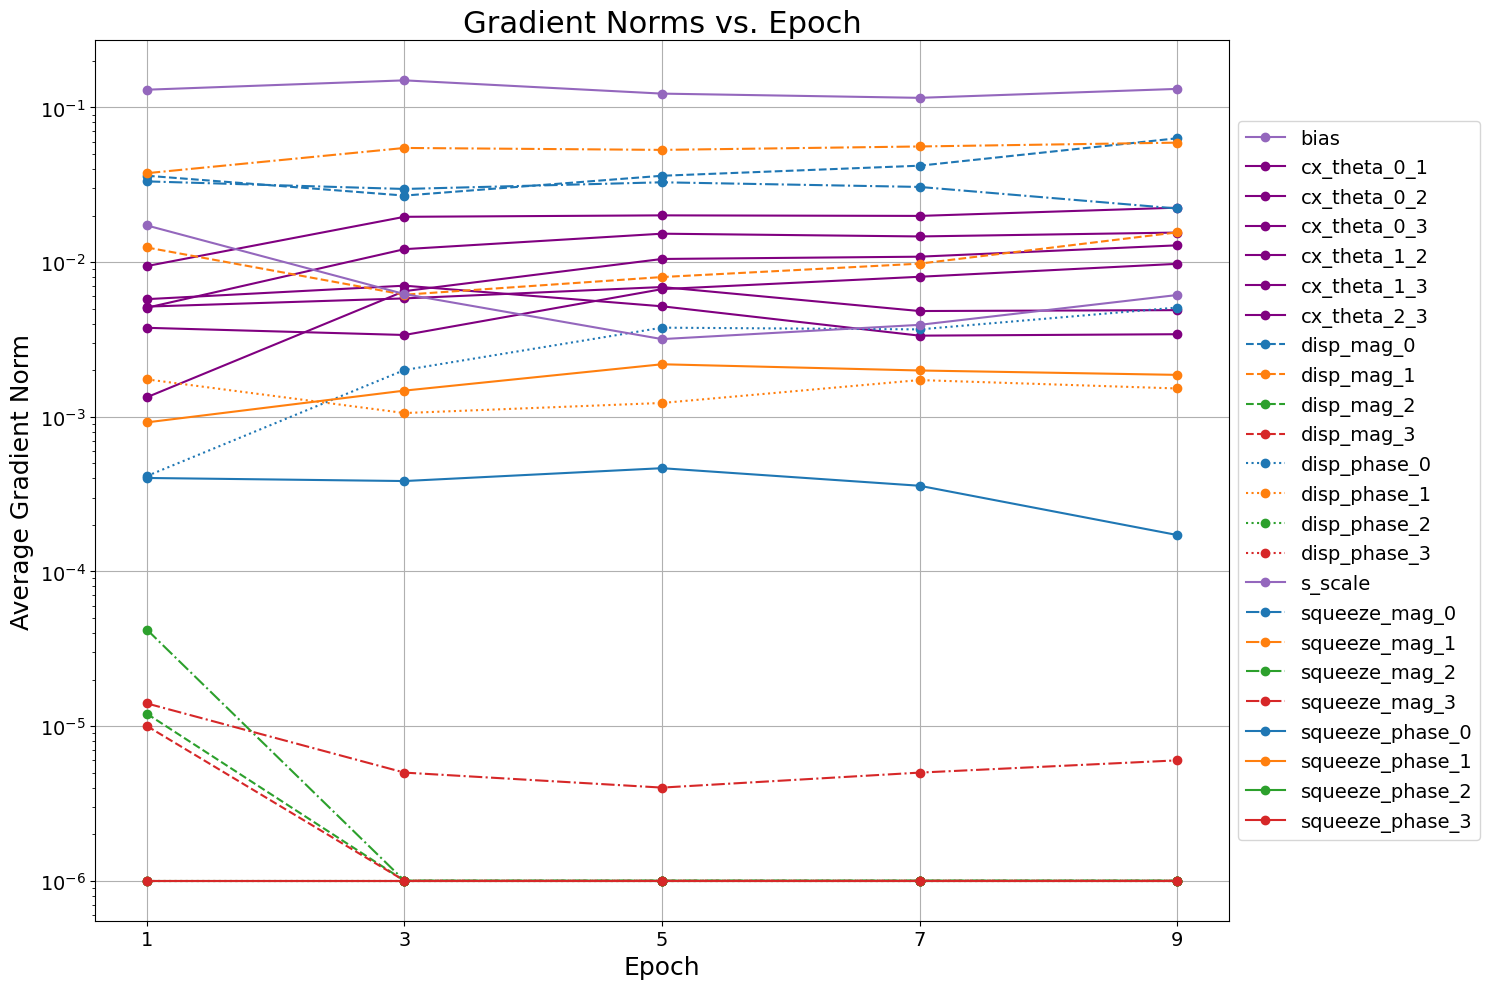

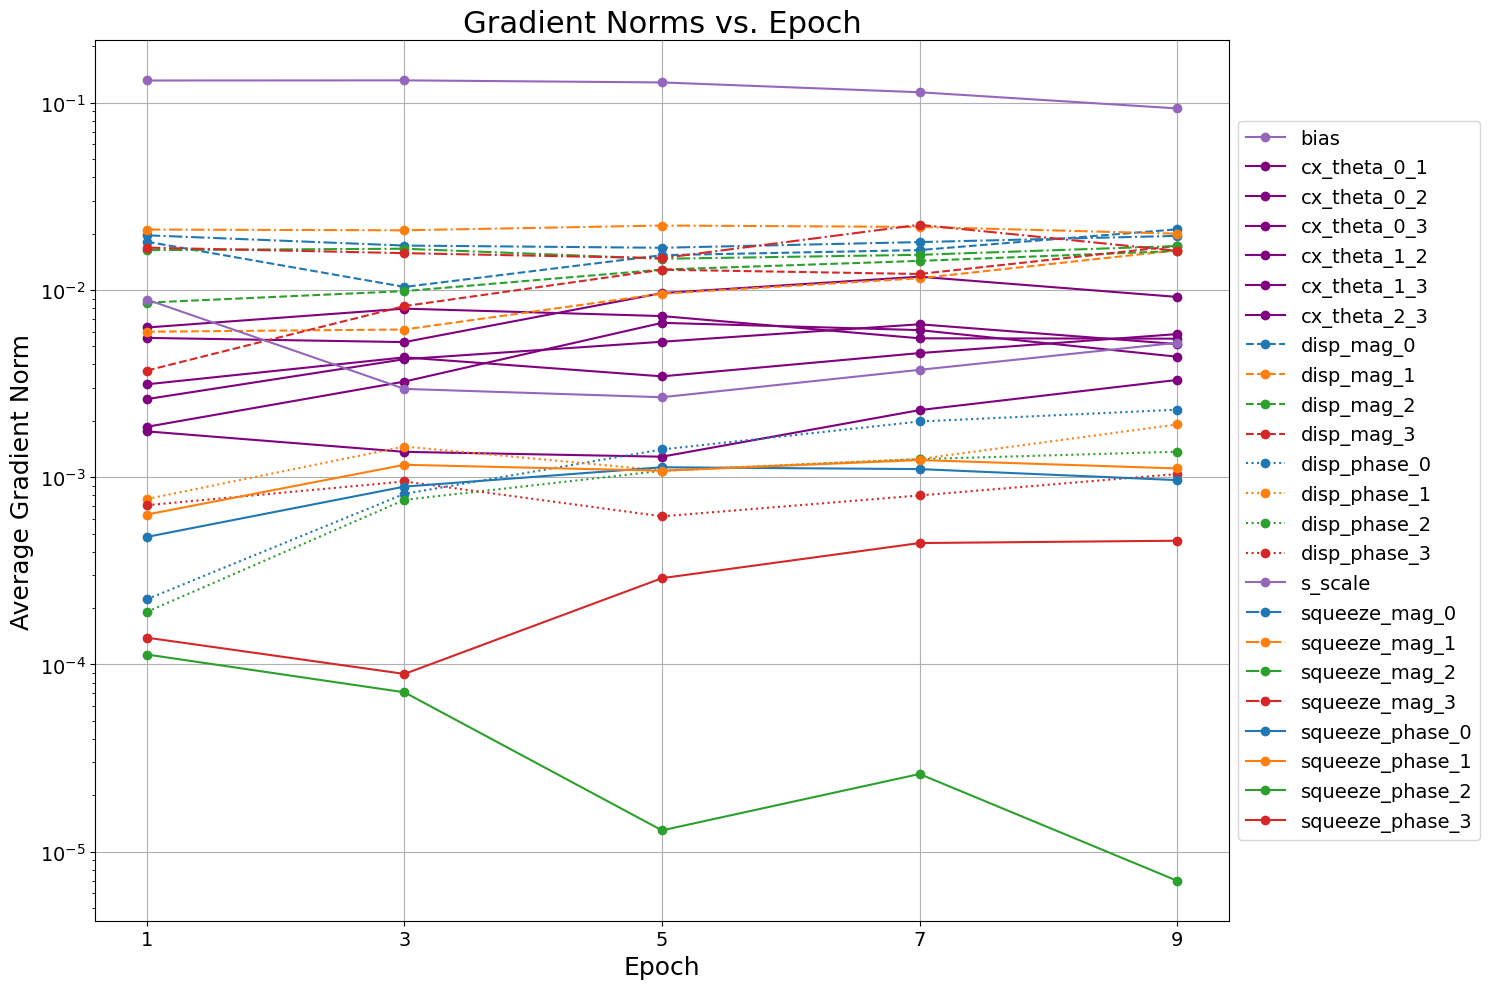

In [3]:
# Specify the path to your log file here
log_file_path = 'sf_refactor/sf_main_logs/2_photons_mini.log'

# Parse the log file
gradient_data = parse_gradient_norms(log_file_path)

# Plot the results
plot_all_variable_norms(gradient_data)
# Specify the path to your 4_photons_mini log file
log_file_path = 'sf_refactor/sf_main_logs/4_photons_mini.log'

# Parse the log file
gradient_data = parse_gradient_norms(log_file_path)

# Plot the results
plot_all_variable_norms(gradient_data)


In [1]:
import strawberryfields as sf
import tensorflow as tf
sf.about()
print("Num PUs Available: ", len(tf.config.list_physical_devices()))
print(tf.config.list_physical_devices())
if tf.test.is_built_with_cuda():
    print("TensorFlow is built with CUDA (GPU) support.")
else:
    print("TensorFlow is CPU-only (no GPU support).")
cuda_version = tf.sysconfig.get_build_info()
print("CUDA Toolkit version:", cuda_version)

2025-07-02 22:54:17.151357: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-02 22:54:17.197644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751493257.216189  785473 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751493257.222251  785473 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751493257.243840  785473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 


Strawberry Fields: a Python library for continuous-variable quantum circuits.
Copyright 2018-2020 Xanadu Quantum Technologies Inc.

Python version:            3.9.23
Platform info:             Linux-4.18.0-477.27.1.el8_8.x86_64-x86_64-with-glibc2.28
Installation path:         /rds/general/user/lr1424/home/miniconda3/envs/qml-env/lib/python3.9/site-packages/strawberryfields
Strawberry Fields version: 0.23.0
Numpy version:             1.26.4
Scipy version:             1.11.4
SymPy version:             1.14.0
NetworkX version:          3.2.1
The Walrus version:        0.21.0
Blackbird version:         0.5.0
XCC version:               0.3.2
TensorFlow version:        2.19.0
Num PUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
TensorFlow is built with CUDA (GPU) support.
CUDA Toolkit version: OrderedDict([('cpu_compiler', '/usr/lib/llvm-18/bin/clang'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12

2025-07-02 22:54:29.734150: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Heavily Simplified Version - Testing for non-zero gradients

### Working basic example w/ demo circuit from [here](https://strawberryfields.ai/photonics/demos/run_tutorial_machine_learning.html)

In [3]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, BSgate, CXgate
import tensorflow as tf, numpy as np, h5py, os, random

# ----------  hyper-params ----------
CUT_OFF     = 7                 # fock cutoff dim
WIRES       = 1
LAYERS      = 1
STEPS       = 50
LR          = 0.01
MAX_JETS    = 200               # keep it tiny for the demo
DATA_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
# -----------------------------------

# ----------  load a small dataset ----------
with h5py.File(DATA_DIR, "r") as f:
    X = f["jetConstituentsList"][:MAX_JETS, :WIRES, :]     # (N,4,3)
    y = f["truth_labels"][:MAX_JETS].astype(np.float32)     # (N,)

jets   = tf.convert_to_tensor(X, tf.float32)
labels = tf.convert_to_tensor(y, tf.float32)

prog = sf.Program(WIRES)

alpha, phi = prog.params("alpha", "phi")

with prog.context as q:
    Dgate(alpha, phi) | q[0]

tf_alpha = tf.Variable(0.1)
tf_phi = tf.Variable(0.1)

opt = tf.keras.optimizers.Adam(LR)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
mse = tf.keras.losses.MeanSquaredError()

eng = sf.Engine("tf", backend_options={"cutoff_dim": CUT_OFF})

# -------- training loop ----------
for step in range(STEPS):
    i = random.randrange(MAX_JETS)
    jet, label = jets[i], labels[i]

    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        state = eng.run(prog, args={"alpha": tf_alpha, "phi": tf_phi}).state
        # print(state)
        # print(state.mean_photon(0))
        # print(tf.shape(state.mean_photon(0)),  "---", tf.shape(label))
        mean_photon = state.mean_photon(0)[0]          # discard the variance
        y_pred      = tf.expand_dims(mean_photon, 0)   # shape (1,)
        y_true      = tf.expand_dims(label, 0)         # shape (1,)

        loss = mse(y_true, y_pred)

    vars_ = [tf_alpha, tf_phi] 
    grads = tape.gradient(loss, vars_)
    opt.apply_gradients(zip(grads, vars_))

    if step % 5 == 0:
        gnorms = [tf.norm(g).numpy() if g is not None else 0.0 for g in grads]
        print(f"step {step:4d}  loss={loss.numpy():.4f}  "
              f"gnorms={['%.1e'%n for n in gnorms[:6]]}")


step    0  loss=0.9801  gnorms=['4.0e-01', '2.2e-10']
step    5  loss=0.0005  gnorms=['1.3e-02', '1.3e-11']
step   10  loss=0.0013  gnorms=['2.7e-02', '0.0e+00']
step   15  loss=0.8988  gnorms=['8.6e-01', '2.6e-10']
step   20  loss=0.8630  gnorms=['9.9e-01', '2.8e-09']
step   25  loss=0.0091  gnorms=['1.2e-01', '4.5e-13']
step   30  loss=0.7789  gnorms=['1.2e+00', '1.9e-09']
step   35  loss=0.0239  gnorms=['2.4e-01', '3.6e-10']
step   40  loss=0.6565  gnorms=['1.4e+00', '4.7e-10']
step   45  loss=0.0560  gnorms=['4.6e-01', '6.2e-11']


### Working with simplified version of my circuit (after scaling pT down)

In [4]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, BSgate, CXgate
import tensorflow as tf, numpy as np, h5py, os, random

# ----------  hyper-params ----------
CUT_OFF     = 7                 # fock cutoff dim
WIRES       = 1
LAYERS      = 1
STEPS       = 50
LR          = 0.01
MAX_JETS    = 200               # keep it tiny for the demo
DATA_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
# -----------------------------------

# ----------  load a small dataset ----------
with h5py.File(DATA_DIR, "r") as f:
    X = f["jetConstituentsList"][:MAX_JETS, :WIRES, :]     # (N,4,3)
    y = f["truth_labels"][:MAX_JETS].astype(np.float32)     # (N,)

jets   = tf.convert_to_tensor(X, tf.float32)
labels = tf.convert_to_tensor(y, tf.float32)

# -------- symbolic circuit ----------
prog = sf.Program(WIRES)
s_scale = prog.params("s_scale")

eta = prog.params("eta")
phi = prog.params("phi")
pt  = prog.params("pt")

with prog.context as q:
    scale = 10.0 / (1 + sf.math.exp(-s_scale)) + 0.01
    Sgate(eta, pt*phi/2) | q[0]
    Dgate(scale*pt, eta)    | q[0]
    # CXgate(1.0) | (q[0], q[1])

# # -------- one tf.Variable per placeholder  ############## FIX ##############
rnd = tf.random_uniform_initializer(-0.1, 0.1)
tf_s_scale = tf.Variable(rnd(()))

def make_args(jet):
    d = {"s_scale": tf_s_scale}    
    pt, eta, phi = jet[0, 2], jet[0, 0], jet[0, 1]
    # Scale pt to [0, 1] via Aritra's case_reader.py
    # Use dictionaries for feature limits
    assumed_limits = {
        'pt': [1e-4, 3000.0],    # assumed limits for pt
        'eta': [-0.8, 0.8],      # example limits for eta
        'phi': [-0.8, 0.8],  # example limits for phi
    }
    feature_limits = {
        'pt': [0.0, 1.0],        # limits for the feature space
        'eta': [-np.pi, np.pi],
        'phi': [-np.pi, np.pi],
    }
    scaled_pt = ((pt - assumed_limits["pt"][0]) / (assumed_limits["pt"][1] - assumed_limits["pt"][0])) * (feature_limits["pt"][1] - feature_limits["pt"][0]) + feature_limits["pt"][0]
    scaled_eta = ((eta - assumed_limits["eta"][0]) / (assumed_limits["eta"][1] - assumed_limits["eta"][0])) * (feature_limits["eta"][1] - feature_limits["eta"][0]) + feature_limits["eta"][0]
    scaled_phi = ((phi - assumed_limits["phi"][0]) / (assumed_limits["phi"][1] - assumed_limits["phi"][0])) * (feature_limits["phi"][1] - feature_limits["phi"][0]) + feature_limits["phi"][0]
    # print("pt =", pt, "scaled_pt =",scaled_pt)
    pt = scaled_pt
    eta = scaled_eta
    phi = scaled_phi

    d[f"eta"] = eta
    d[f"phi"] = phi
    d[f"pt"]  = pt

    return d

opt = tf.keras.optimizers.Adam(LR)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

eng = sf.Engine("tf", backend_options={"cutoff_dim": CUT_OFF})

# -------- training loop ----------
for step in range(STEPS):
    i = random.randrange(MAX_JETS)
    jet, label = jets[i], labels[i]

    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        state = eng.run(prog, args=make_args(jet)).state
        mean_photon = state.mean_photon(0)[0]          # discard the variance
        y_pred      = tf.expand_dims(mean_photon, 0)   # shape (1,)
        y_true      = tf.expand_dims(label, 0)         # shape (1,)

        loss = bce(y_true, y_pred)

    vars_ = [tf_s_scale]
    grads = tape.gradient(loss, vars_)
    opt.apply_gradients(zip(grads, vars_))

    if step % 5 == 0:
        gnorms = [tf.norm(g).numpy() if g is not None else 0.0 for g in grads]
        print(f"step {step:4d}  loss={loss.numpy():.4f}  "
              f"gnorms={['%.1e'%n for n in gnorms[:6]]}")

step    0  loss=0.6722  gnorms=['2.1e-02']
step    5  loss=0.6993  gnorms=['4.6e-03']
step   10  loss=0.6862  gnorms=['2.4e-03']
step   15  loss=0.6442  gnorms=['3.7e-02']
step   20  loss=0.6141  gnorms=['1.2e-02']
step   25  loss=0.8035  gnorms=['1.1e-01']
step   30  loss=0.7192  gnorms=['2.6e-02']
step   35  loss=0.8194  gnorms=['1.3e-01']
step   40  loss=0.6726  gnorms=['5.5e-03']
step   45  loss=0.7056  gnorms=['8.1e-03']


### Seemingly working with full circuit ... except

In [5]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, BSgate, CXgate
import tensorflow as tf, numpy as np, h5py, os, random

# ----------  hyper-params ----------
CUT_OFF     = 7                 # fock cutoff dim
WIRES       = 4
LAYERS      = 1
STEPS       = 50
LR          = 0.01
MAX_JETS    = 200               # keep it tiny for the demo
DATA_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
# -----------------------------------

# ----------  load a small dataset ----------
with h5py.File(DATA_DIR, "r") as f:
    X = f["jetConstituentsList"][:MAX_JETS, :WIRES, :]     # (N,4,3)
    y = f["truth_labels"][:MAX_JETS].astype(np.float32)     # (N,)

jets   = tf.convert_to_tensor(X, tf.float32)
labels = tf.convert_to_tensor(y, tf.float32)

# -------- symbolic circuit ----------
prog = sf.Program(WIRES)
s_scale = prog.params("s_scale")
DM  = [prog.params(f"DM{w}") for w in range(WIRES)]
DP  = [prog.params(f"DP{w}") for w in range(WIRES)]
SM  = [prog.params(f"SM{w}") for w in range(WIRES)]
SP  = [prog.params(f"SP{w}") for w in range(WIRES)]
eta = [prog.params(f"eta{w}") for w in range(WIRES)]
phi = [prog.params(f"phi{w}") for w in range(WIRES)]
pt  = [prog.params(f"pt{w}")  for w in range(WIRES)]


with prog.context as q:
    scale = 10.0 / (1.0 + sf.math.exp(-s_scale)) + 0.01
    for w in range(WIRES):
        Sgate(eta[w], pt[w]*phi[w]/2) | q[w]
        Dgate(scale*pt[w], eta[w])    | q[w]
    for a,b in [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]:
        CXgate(1.0) | (q[a], q[b])
    for w in range(WIRES):
        Sgate(SM[w], SP[w]) | q[w]
        Dgate(DM[w], DP[w]) | q[w]

# # -------- one tf.Variable per placeholder 
rnd = tf.random_uniform_initializer(-0.1, 0.1)
tf_s_scale = tf.Variable(rnd(()))
tf_DM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_DP = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SP = [tf.Variable(rnd(())) for _ in range(WIRES)]

assumed_limits = {
    'pt':  [1e-4, 3000.0],
    'eta': [-0.8, 0.8],
    'phi': [-0.8, 0.8],
}
feature_limits = {
    'pt':  [0.0, 1.0],
    'eta': [-np.pi, np.pi],
    'phi': [-np.pi, np.pi],
}

def scale_feature(value, name):
    """Affine-map any feature from its assumed data range to the network range."""
    a_min, a_max = assumed_limits[name]
    f_min, f_max = feature_limits[name]
    return (value - a_min) / (a_max - a_min) * (f_max - f_min) + f_min

def make_args(jet):
    d = {"s_scale": tf_s_scale}
    for w in range(WIRES):
        d[f"DM{w}"] = tf_DM[w]
        d[f"DP{w}"] = tf_DP[w]
        d[f"SM{w}"] = tf_SM[w]
        d[f"SP{w}"] = tf_SP[w]

        d[f"eta{w}"] = scale_feature(jet[w, 0], "eta")
        d[f"phi{w}"] = scale_feature(jet[w, 1], "phi")
        d[f"pt{w}"]  = scale_feature(jet[w, 2], "pt")
    return d

opt = tf.keras.optimizers.Adam(LR)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

eng = sf.Engine("tf", backend_options={"cutoff_dim": CUT_OFF})

# -------- training loop ----------
for step in range(STEPS):
    i = random.randrange(MAX_JETS)
    jet, label = jets[i], labels[i]
    # print("pt0 =", jet[0, 2].numpy())      # add just after you sample `jet`
    
    # print("scale*pt =", tf_s_scale*pt)
    # print("pt*pt*phi/2 =", pt*pt*phi/2)


    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        state = eng.run(prog, args=make_args(jet)).state
        photons = tf.stack([state.mean_photon(m) for m in range(3)])
        logit   = tf.reduce_sum(photons)
        loss    = bce(tf.expand_dims(label,0), tf.expand_dims(logit,0))
        # mean_photon = state.mean_photon(0)[0]          # discard the variance
        # y_pred      = tf.expand_dims(mean_photon, 0)   # shape (1,)
        # y_true      = tf.expand_dims(label, 0)         # shape (1,)

        # loss = bce(y_true, y_pred)

    vars_ = [tf_s_scale, *tf_DM, *tf_DP, *tf_SM, *tf_SP]  
    grads = tape.gradient(loss, vars_)
    opt.apply_gradients(zip(grads, vars_))

    if step % 5 == 0:
        gnorms = [tf.norm(g).numpy() if g is not None else 0.0 for g in grads]
        print(f"step {step:4d}  loss={loss.numpy():.4f}  "
              f"gnorms={['%.1e'%n for n in gnorms[:6]]}")

step    0  loss=0.0568  gnorms=['2.3e-03', '2.6e-03', '8.9e-03', '6.7e-03', '1.0e-03', '8.2e-05']
step    5  loss=2.0657  gnorms=['4.4e-01', '3.3e-01', '4.5e-01', '3.8e-01', '1.1e-02', '2.2e-03']
step   10  loss=1.7634  gnorms=['3.0e-01', '7.6e-02', '4.1e-01', '5.1e-01', '1.3e-02', '2.4e-05']
step   15  loss=1.7323  gnorms=['4.1e-01', '3.5e-02', '3.8e-01', '5.4e-01', '2.1e-02', '1.2e-03']
step   20  loss=2.1158  gnorms=['3.6e-01', '4.4e-03', '5.6e-01', '2.3e-01', '3.1e-02', '6.5e-03']
step   25  loss=0.0654  gnorms=['4.6e-03', '1.9e-03', '4.1e-03', '1.5e-02', '3.3e-03', '4.5e-04']
step   30  loss=1.6088  gnorms=['2.1e-01', '1.2e-01', '2.3e-01', '2.3e-01', '3.1e-02', '3.5e-04']
step   35  loss=1.5967  gnorms=['2.9e-01', '1.6e-01', '4.1e-02', '9.6e-02', '3.4e-02', '1.0e-02']
step   40  loss=0.2684  gnorms=['4.7e-02', '2.5e-02', '3.8e-02', '5.8e-02', '1.2e-02', '4.7e-03']
step   45  loss=1.3017  gnorms=['2.6e-01', '7.4e-02', '8.4e-02', '1.6e-01', '2.6e-02', '9.4e-04']


### Same as above (with additional debugging); keeping above to show it worked at least once.

- Only works first time, then get the error:
```
WARNING:tensorflow:Gradients do not exist for variables ['Variable:0'] when minimizing the loss.
step    0  loss=0.2500  gnorms=['0.0e+00', '8.2e-03', '1.2e-03', '1.7e-02', '2.9e-03', '2.5e-05']
```

In [ ]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, BSgate, CXgate
import tensorflow as tf, numpy as np, h5py, os, random

# ----------  hyper-params ----------
CUT_OFF     = 7                 # fock cutoff dim
WIRES       = 4
LAYERS      = 1
STEPS       = 50
LR          = 0.01
MAX_JETS    = 200               # keep it tiny for the demo
DATA_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
# -----------------------------------

# ----------  load a small dataset ----------
with h5py.File(DATA_DIR, "r") as f:
    X = f["jetConstituentsList"][:MAX_JETS, :WIRES, :]     # (N,4,3)
    y = f["truth_labels"][:MAX_JETS].astype(np.float32)     # (N,)

jets   = tf.convert_to_tensor(X, tf.float32)
labels = tf.convert_to_tensor(y, tf.float32)

# -------- symbolic circuit ----------
prog = sf.Program(WIRES)
s_scale = prog.params("s_scale")
DM  = [prog.params(f"DM{w}") for w in range(WIRES)]
DP  = [prog.params(f"DP{w}") for w in range(WIRES)]
SM  = [prog.params(f"SM{w}") for w in range(WIRES)]
SP  = [prog.params(f"SP{w}") for w in range(WIRES)]
eta = [prog.params(f"eta{w}") for w in range(WIRES)]
phi = [prog.params(f"phi{w}") for w in range(WIRES)]
pt  = [prog.params(f"pt{w}")  for w in range(WIRES)]


with prog.context as q:
    scale = 10.0 / (1.0 + sf.math.exp(-s_scale)) + 0.01
    for w in range(WIRES):
        Sgate(eta[w], pt[w]*phi[w]/2) | q[w]
        Dgate(scale*pt[w], eta[w])    | q[w]
    for a,b in [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]:
        CXgate(1.0) | (q[a], q[b])
    for w in range(WIRES):
        Sgate(SM[w], SP[w]) | q[w]
        Dgate(DM[w], DP[w]) | q[w]

# # -------- one tf.Variable per placeholder 
rnd = tf.random_uniform_initializer(-0.1, 0.1)
tf_s_scale = tf.Variable(rnd(()))
# print("tf_s_scale =", tf_s_scale.numpy())
tf_DM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_DP = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SP = [tf.Variable(rnd(())) for _ in range(WIRES)]

assumed_limits = {
    'pt':  [1e-4, 3000.0],
    'eta': [-0.8, 0.8],
    'phi': [-0.8, 0.8],
}
feature_limits = {
    'pt':  [0.0, 1.0],
    'eta': [-np.pi, np.pi],
    'phi': [-np.pi, np.pi],
}

# EPS = 1e-3          

def scale_feature(value, name):
    """Affine-map any feature from its assumed data range to the network range."""
    a_min, a_max = assumed_limits[name]
    f_min, f_max = feature_limits[name]
    out = (value - a_min) / (a_max - a_min) * (f_max - f_min) + f_min
    # if name == "pt":
    #     out = tf.maximum(out, EPS)
    return out

def make_args(jet):
    d = {"s_scale": tf_s_scale}
    for w in range(WIRES):
        d[f"DM{w}"] = tf_DM[w]
        d[f"DP{w}"] = tf_DP[w]
        d[f"SM{w}"] = tf_SM[w]
        d[f"SP{w}"] = tf_SP[w]

        d[f"eta{w}"] = scale_feature(jet[w, 0], "eta")
        d[f"phi{w}"] = scale_feature(jet[w, 1], "phi")
        d[f"pt{w}"]  = scale_feature(jet[w, 2], "pt")
        # print("Dgate w/", tf_s_scale.numpy()*d[f"pt{w}"].numpy())
    return d

opt = tf.keras.optimizers.Adam(LR)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)

eng = sf.Engine("tf", backend_options={"cutoff_dim": CUT_OFF})

# -------- training loop ----------
for step in range(STEPS):
    i = random.randrange(MAX_JETS)
    jet, label = jets[i], labels[i]
    if tf.reduce_all(jet[..., 2] == 0.0):
        continue 
    # print("pt0 =", jet[0, 2].numpy())      # add just after you sample `jet`
    
    # print("scale*pt =", tf_s_scale*pt)
    # print("pt*pt*phi/2 =", pt*pt*phi/2)


    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        tape.watch(tf_s_scale)
        state = eng.run(prog, args=make_args(jet)).state
        photons = tf.stack([state.mean_photon(m) for m in range(3)])
        logit   = tf.reduce_sum(photons)
        loss    = bce(tf.expand_dims(label,0), tf.expand_dims(logit,0))
        # mean_photon = state.mean_photon(0)[0]          # discard the variance
        # y_pred      = tf.expand_dims(mean_photon, 0)   # shape (1,)
        # y_true      = tf.expand_dims(label, 0)         # shape (1,)

        # loss = bce(y_true, y_pred)

    vars_ = [tf_s_scale, *tf_DM, *tf_DP, *tf_SM, *tf_SP]  
    grads = tape.gradient(loss, vars_)
    if grads[0] is None:
        print("⚠️  grad None; pT’s were", jet[:, 2].numpy())
    opt.apply_gradients(zip(grads, vars_))

    if step % 5 == 0:
        gnorms = [tf.norm(g).numpy() if g is not None else 0.0 for g in grads]
        print(f"step {step:4d}  loss={loss.numpy():.4f}  "
              f"gnorms={['%.1e'%n for n in gnorms[:6]]}")

⚠️  grad None; pT’s were [240.02118  125.55173   78.10409   55.470455]
step    0  loss=2.3560  gnorms=['0.0e+00', '3.2e-01', '3.2e-01', '5.5e-01', '1.6e-02', '4.1e-03']
⚠️  grad None; pT’s were [713.04114   23.53077   23.516682  18.784554]
⚠️  grad None; pT’s were [496.59155  137.78369  114.573     50.280598]
⚠️  grad None; pT’s were [68.94876  50.186806 49.476826 49.182854]
⚠️  grad None; pT’s were [95.76376  59.773476 38.720997 38.42305 ]
⚠️  grad None; pT’s were [80.27804  54.4434   44.192066 29.433529]
step    5  loss=2.2157  gnorms=['0.0e+00', '1.1e-01', '3.3e-03', '2.4e-02', '7.9e-02', '2.0e-03']
⚠️  grad None; pT’s were [307.49683  145.66698   95.09012   37.446888]
⚠️  grad None; pT’s were [88.96303  77.79551  71.32266  37.119316]
⚠️  grad None; pT’s were [176.4177   130.43      79.05531   50.509792]
⚠️  grad None; pT’s were [192.16554   76.00975   68.331215  55.938663]
⚠️  grad None; pT’s were [135.75758   88.16328   74.204605  67.8978  ]
step   10  loss=1.7244  gnorms=['0.0e+0

: 

### Add test and Val

In [ ]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, Sgate, BSgate, CXgate
import tensorflow as tf, numpy as np, h5py, os, random
from sklearn.metrics import roc_auc_score

# ----------  hyper-params ----------
CUT_OFF     = 7                 # fock cutoff dim
WIRES       = 4
LAYERS      = 1
STEPS       = 50
LR          = 0.01
MAX_JETS    = 200               # keep it tiny for the demo
DATA_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_train/TTBar+ZJets_flat.h5"
VAL_DIR     = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_val/TTBar+ZJets_flat.h5"
TEST_DIR    = "/rds/general/user/lr1424/home/1P1Qm_SF/flat_test/TTBar+ZJets_flat.h5"
# -----------------------------------

# ----------  load datasets ----------
def load_data(path, max_jets=MAX_JETS):
    with h5py.File(path, "r") as f:
        X = f["jetConstituentsList"][:max_jets, :WIRES, :]     # (N,4,3)
        y = f["truth_labels"][:max_jets].astype(np.float32)     # (N,)
    return tf.convert_to_tensor(X, tf.float32), tf.convert_to_tensor(y, tf.float32)

jets, labels = load_data(DATA_DIR)
jets_val, labels_val = load_data(VAL_DIR)
jets_test, labels_test = load_data(TEST_DIR)

# -------- symbolic circuit ----------
prog = sf.Program(WIRES)
s_scale = prog.params("s_scale")
DM  = [prog.params(f"DM{w}") for w in range(WIRES)]
DP  = [prog.params(f"DP{w}") for w in range(WIRES)]
SM  = [prog.params(f"SM{w}") for w in range(WIRES)]
SP  = [prog.params(f"SP{w}") for w in range(WIRES)]
eta = [prog.params(f"eta{w}") for w in range(WIRES)]
phi = [prog.params(f"phi{w}") for w in range(WIRES)]
pt  = [prog.params(f"pt{w}")  for w in range(WIRES)]

with prog.context as q:
    scale = 10.0 / (1.0 + sf.math.exp(-s_scale)) + 0.01
    for w in range(WIRES):
        Sgate(eta[w], pt[w]*phi[w]/2) | q[w]
        Dgate(scale*pt[w], eta[w])    | q[w]
    for a,b in [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]:
        CXgate(1.0) | (q[a], q[b])
    for w in range(WIRES):
        Sgate(SM[w], SP[w]) | q[w]
        Dgate(DM[w], DP[w]) | q[w]

rnd = tf.random_uniform_initializer(-0.1, 0.1)
tf_s_scale = tf.Variable(rnd(()))
tf_DM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_DP = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SM = [tf.Variable(rnd(())) for _ in range(WIRES)]
tf_SP = [tf.Variable(rnd(())) for _ in range(WIRES)]

assumed_limits = {
    'pt':  [1e-4, 3000.0],
    'eta': [-0.8, 0.8],
    'phi': [-0.8, 0.8],
}
feature_limits = {
    'pt':  [0.0, 1.0],
    'eta': [-np.pi, np.pi],
    'phi': [-np.pi, np.pi],
}

def scale_feature(value, name):
    a_min, a_max = assumed_limits[name]
    f_min, f_max = feature_limits[name]
    return (value - a_min) / (a_max - a_min) * (f_max - f_min) + f_min

def make_args(jet):
    d = {"s_scale": tf_s_scale}
    for w in range(WIRES):
        d[f"DM{w}"] = tf_DM[w]
        d[f"DP{w}"] = tf_DP[w]
        d[f"SM{w}"] = tf_SM[w]
        d[f"SP{w}"] = tf_SP[w]
        d[f"eta{w}"] = scale_feature(jet[w, 0], "eta")
        d[f"phi{w}"] = scale_feature(jet[w, 1], "phi")
        d[f"pt{w}"]  = scale_feature(jet[w, 2], "pt")
    return d

opt = tf.keras.optimizers.Adam(LR)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
eng = sf.Engine("tf", backend_options={"cutoff_dim": CUT_OFF})

# -------- training loop ----------
for step in range(STEPS):
    i = random.randrange(MAX_JETS)
    jet, label = jets[i], labels[i]
    if eng.run_progs:
        eng.reset()
    with tf.GradientTape() as tape:
        state = eng.run(prog, args=make_args(jet)).state
        photons = tf.stack([state.mean_photon(m) for m in range(3)])
        logit   = tf.reduce_sum(photons)
        print("⟨n⟩ =", tf.reduce_sum(photons).numpy())
        loss    = bce(tf.expand_dims(label,0), tf.expand_dims(logit,0))
    vars_ = [tf_s_scale, *tf_DM, *tf_DP, *tf_SM, *tf_SP]  
    grads = tape.gradient(loss, vars_)
    opt.apply_gradients(zip(grads, vars_))
    if step % 5 == 0:
        gnorms = [tf.norm(g).numpy() if g is not None else 0.0 for g in grads]
        print(f"step {step:4d}  loss={loss.numpy():.4f}  "
              f"gnorms={['%.1e'%n for n in gnorms[:6]]}")

# --------- Evaluate and print AUC ---------
def predict_logits(jets_tensor):
    logits = []
    for jet in jets_tensor:
        state = eng.run(prog, args=make_args(jet)).state
        photons = tf.stack([state.mean_photon(m) for m in range(3)])
        logit = tf.reduce_sum(photons).numpy()
        logits.append(logit)
    return np.array(logits)

logits_val = predict_logits(jets_val)
auc_val = roc_auc_score(labels_val.numpy(), logits_val)
print(f"Validation AUC: {auc_val:.4f}")

logits_test = predict_logits(jets_test)
auc_test = roc_auc_score(labels_test.numpy(), logits_test)
print(f"Test AUC: {auc_test:.4f}")

⟨n⟩ = 3.4734027
step    0  loss=0.0305  gnorms=['0.0e+00', '1.5e-03', '2.1e-03', '3.2e-03', '1.3e-03', '1.6e-04']
⟨n⟩ = 2.8781526
⟨n⟩ = 2.2450297
⟨n⟩ = 4.7176275
⟨n⟩ = 4.5668917
⟨n⟩ = 4.9504476
step    5  loss=0.0071  gnorms=['0.0e+00', '2.8e-03', '1.2e-03', '1.4e-03', '3.0e-04', '3.3e-05']
⟨n⟩ = 1.5067389
⟨n⟩ = 2.715891
⟨n⟩ = 2.6605167
⟨n⟩ = 4.8122396
⟨n⟩ = 2.9025989
step   10  loss=2.9560  gnorms=['0.0e+00', '2.0e-02', '3.3e-01', '3.1e-01', '8.3e-02', '2.0e-02']
⟨n⟩ = 1.6540494
⟨n⟩ = 3.1371894
⟨n⟩ = 4.7245255
⟨n⟩ = 4.2510567
⟨n⟩ = 3.467289
step   15  loss=0.0307  gnorms=['0.0e+00', '3.4e-03', '6.6e-03', '8.4e-03', '5.7e-03', '8.7e-04']
⟨n⟩ = 2.4578595
⟨n⟩ = 2.16289
⟨n⟩ = 1.7647659
⟨n⟩ = 2.0694866
⟨n⟩ = 2.2685585
step   20  loss=2.3670  gnorms=['0.0e+00', '1.2e-01', '1.1e-01', '4.3e-02', '2.2e-01', '2.0e-03']
⟨n⟩ = 2.3735878
⟨n⟩ = 2.0818286
⟨n⟩ = 2.6800995
⟨n⟩ = 3.220101
⟨n⟩ = 3.0935752
step   25  loss=3.1379  gnorms=['0.0e+00', '2.0e-01', '9.7e-02', '7.9e-02', '4.5e-01', '1.0e-02']
⟨

KeyboardInterrupt: 

: 